In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
import sklearn.linear_model

In [67]:
dftrain = pd.read_csv('/Users/coen/Desktop/Machine Learning/assignment1/webStats_train.csv', header = None) 
dftest = pd.read_csv('/Users/coen/Desktop/Machine Learning/assignment1/combined.csv', header = None)

In [4]:
np.mean(dftrain.iloc[:,276])

0.11916712788900127

In [108]:
#Useful variables (predictors)
df1train = dftrain.iloc[:,50:55]
df2train = dftrain.iloc[:,60:62]
df3train = dftrain.iloc[:,262:277]
predictor_comments = pd.concat([df1train,df2train, df3train],axis = 1)


#Target variable
target = dftrain.iloc[:,-1]

#Day binary variables
daysbasetime = dftrain.iloc[:,262:269]

dayspublication = dftrain.iloc[:,269:276]



In [45]:
#Useful variables (predictors)
df1test = dftest.iloc[:,50:55]
df2test = dftest.iloc[:,60:62]
df3test = dftest.iloc[:,262:277]
predictor_comments_test = pd.concat([df1test,df2test,df3test],axis = 1)


#Target variable
target_test = dftest.iloc[:,-1]

#Day binary variables
daysbasetime = dftest.iloc[:,262:269]

dayspublication = dftest.iloc[:,269:276]



In [7]:
print(predictor_comments.shape)
print(predictor_comments_test.shape)

(52397, 21)
(7624, 21)


In [109]:
predictor_comments.head()

##Used variables/predictor:

#Column 50: Total number of questions in blog before basetime(df.iloc[:,50])
#Column 51: Number of comments in the last 24 hours before basetime (df.iloc[:,51])
#Column 52: Number of comments added between 48-24 hours before basetime
#Column 53: Amount of comments added in first 24 hours
#Column 54: Difference between 51&52
#Column 60: Amount of time since blogpost
#Column 61: Length of blogpost
#Columns 262 - 268: weekday of basetime
#Columns 269 - 275: weekday of publication
#Columns 276: number of parent pages


,50,51,52,53,54,60,61,262,263,264,...,267,268,269,270,271,272,273,274,275,276
0,2.0,2.0,0.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,6.0,2.0,4.0,5.0,-2.0,35.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,6.0,2.0,4.0,5.0,-2.0,35.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2.0,2.0,0.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3.0,1.0,2.0,2.0,-1.0,34.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
predictor_comments_test.head()


,50,51,52,53,54,60,61,262,263,264,...,266,267,268,269,270,271,272,273,274,275
0,35.0,35.0,0.0,35.0,35.0,9.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,21.0,0.0,2.0,21.0,-2.0,62.0,696.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.0,2.0,0.0,2.0,2.0,13.0,8361.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3.0,3.0,0.0,3.0,3.0,9.0,2751.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,5.0,187.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [110]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score


X_train, X_test, y_train, y_test = predictor_comments, predictor_comments_test, target, target_test


lr_train = LinearRegression()
lr_train.fit(X_train, y_train)
lr_predictions = lr_train.predict(X_train)

print("LR R^2 score = " + str(r2_score(y_train, lr_predictions)) 
      + ", LR MSE score = " + str(mean_squared_error(y_train, lr_predictions)) 
      + ", LR MAE score = " + str(mean_absolute_error(y_train, lr_predictions)))



ridge_train = Ridge(alpha = 1)
ridge_train.fit(X_train, y_train)
ridge_predictions = ridge_train.predict(X_train)

print("Ridge R^2 score = " + str(r2_score(y_train, ridge_predictions)) 
      + ", Ridge MSE score = " + str(mean_squared_error(y_train, ridge_predictions)) 
      + ", Ridge MAE score = " + str(mean_absolute_error(y_train, ridge_predictions)))



lasso_train = Lasso(alpha = 1)
lasso_train.fit(X_train, y_train)
lasso_predictions = lasso_train.predict(X_train)

print("Lasso R^2 score = " + str(r2_score(y_train, lasso_predictions)) 
      + ", Lasso MSE score = " + str(mean_squared_error(y_train, lasso_predictions)) 
      + ", Lasso MAE score = " + str(mean_absolute_error(y_train, lasso_predictions)))

#It does not make much sense to apply lasso/ridge to a non-tested model, since OLS will do exactly what's needed
#Therefore, the R^2's, MSE's and MAE's are very similar. 









LR R^2 score = 0.23313724772567723, LR MSE score = 1090.293158316996, LR MAE score = 8.628917230897517
Ridge R^2 score = 0.23313724767382515, Ridge MSE score = 1090.293158390717, Ridge MAE score = 8.62891233208865
Lasso R^2 score = 0.23270734604887122, Lasso MSE score = 1090.9043744121584, Lasso MAE score = 8.592313213870629


<IPython.core.display.Javascript object>


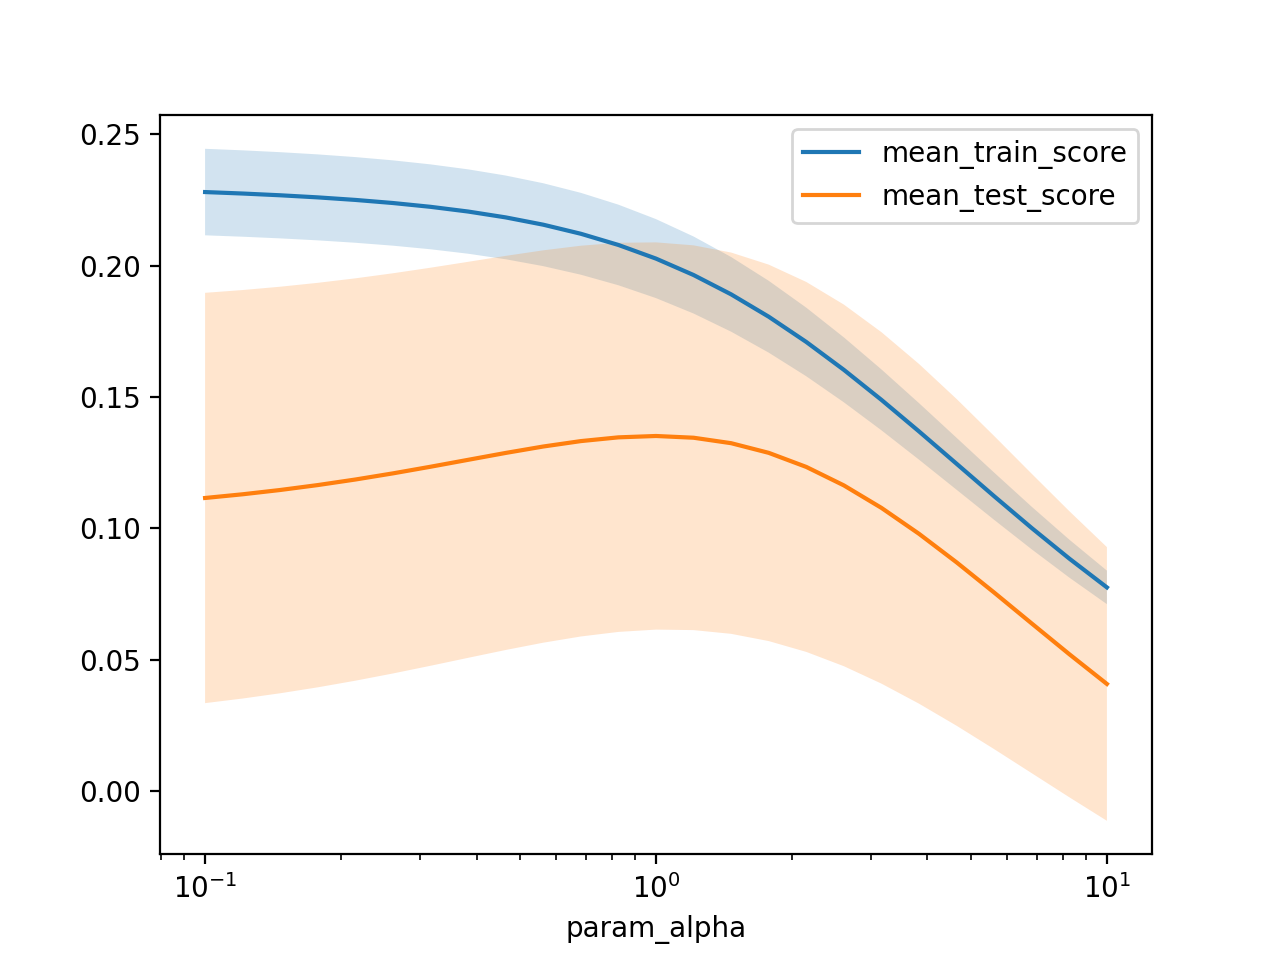

{'alpha': 1.0}
0.13517590932989695


In [111]:
param_grid_Ridge = {'alpha': np.logspace(-1, 1, 25)}
grid_Ridge = GridSearchCV(Ridge(normalize = True), param_grid_Ridge, return_train_score=True, cv=10) #data is normalized
grid_Ridge.fit(X_train, y_train)
results_Ridge = pd.DataFrame(grid_Ridge.cv_results_)
results_Ridge.plot('param_alpha', 'mean_train_score')
results_Ridge.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results_Ridge.param_alpha.astype(np.float),
                 results_Ridge['mean_train_score'] + results_Ridge['std_train_score'],
                 results_Ridge['mean_train_score'] - results_Ridge['std_train_score'], alpha=0.2)
plt.fill_between(results_Ridge.param_alpha.astype(np.float),
                 results_Ridge['mean_test_score'] + results_Ridge['std_test_score'],
                 results_Ridge['mean_test_score'] - results_Ridge['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
print(grid_Ridge.best_params_)
print(grid_Ridge.best_score_)
#Chose to zoom in on [0.01, 1] because that is where the optimal alpha will be.

<IPython.core.display.Javascript object>


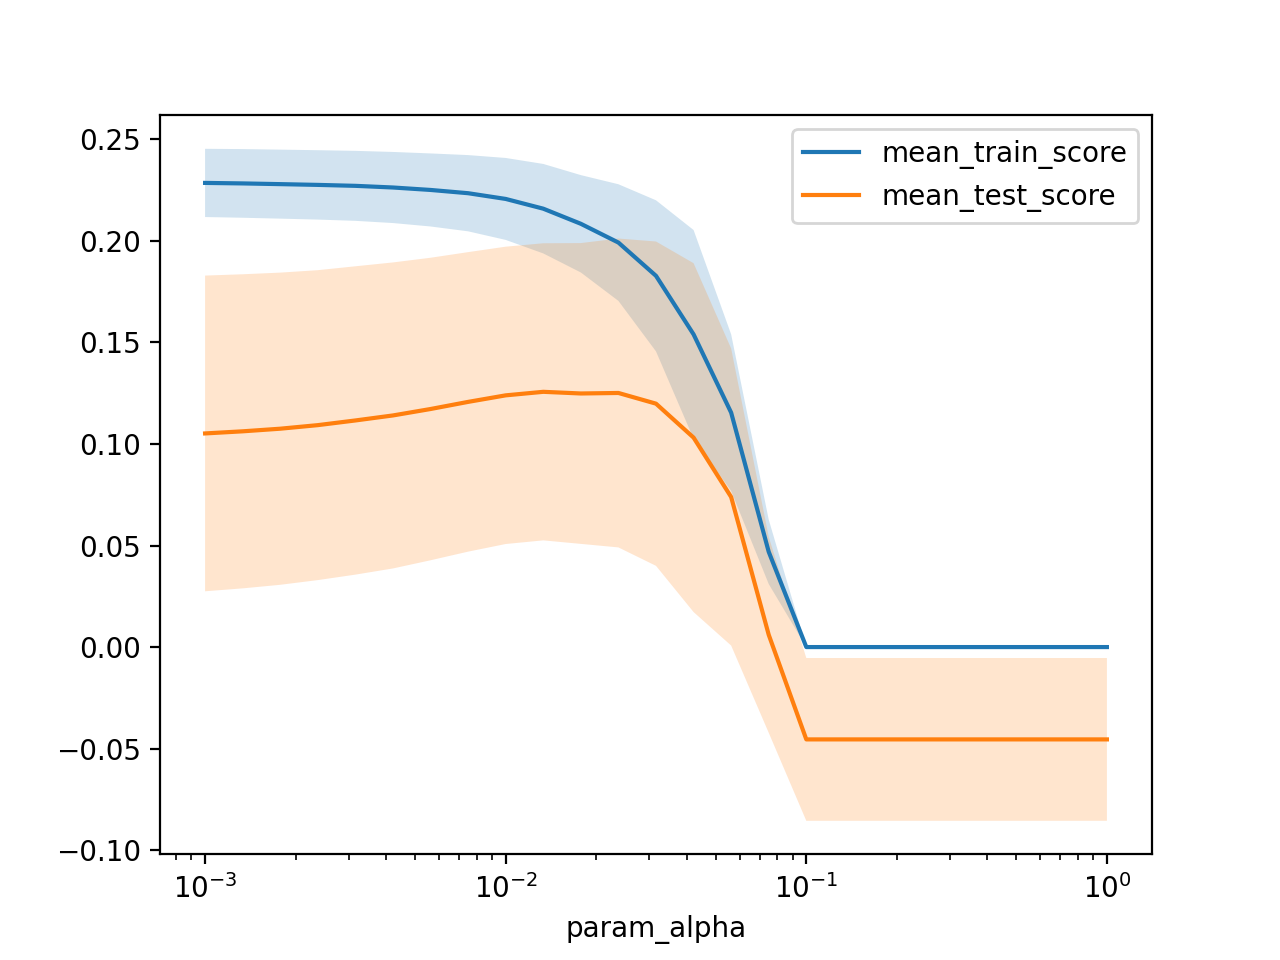

{'alpha': 0.01333521432163324}
0.12567971295755664


In [112]:
param_grid_Lasso = {'alpha': np.logspace(-3, 0, 25)}
grid_Lasso = GridSearchCV(Lasso(normalize = True, max_iter = 1e6), param_grid_Lasso, return_train_score=True, cv=10) #data is normalized
grid_Lasso.fit(X_train, y_train)
results_Lasso = pd.DataFrame(grid_Lasso.cv_results_)
results_Lasso.plot('param_alpha', 'mean_train_score')
results_Lasso.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results_Lasso.param_alpha.astype(np.float),
                 results_Lasso['mean_train_score'] + results_Lasso['std_train_score'],
                 results_Lasso['mean_train_score'] - results_Lasso['std_train_score'], alpha=0.2)
plt.fill_between(results_Lasso.param_alpha.astype(np.float),
                 results_Lasso['mean_test_score'] + results_Lasso['std_test_score'],
                 results_Lasso['mean_test_score'] - results_Lasso['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")
print(grid_Lasso.best_params_)
print(grid_Lasso.best_score_)

In [57]:
#As we can see from the above plots, we can see that the best parameters for alpha are:
#For Ridge [L2]: alpha = 1.0, gives R^2 of ~0.135 for the test set
#For Lasso [L1]: alpha = ~0.013, gives R^2 of ~0.126 for the test set

<IPython.core.display.Javascript object>


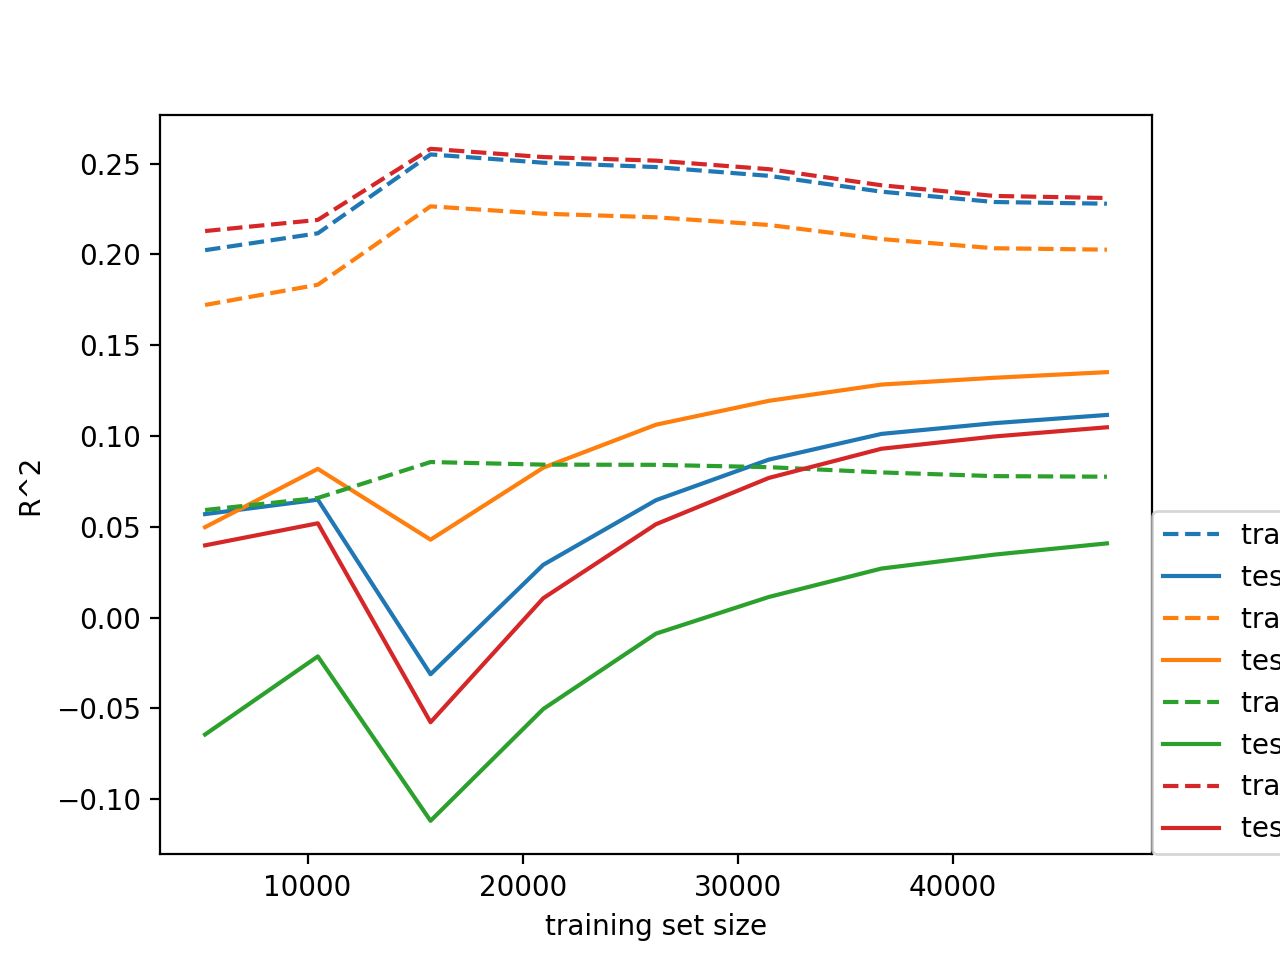

Text(0, 0.5, 'R^2')

In [113]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, name):
    train_set_size, train_scores, test_scores = learning_curve(est, X_train, y_train, cv=10, train_sizes=np.linspace(0, 1, 10)[1:])
    test_mean = test_scores.mean(axis=1)
    train_mean = train_scores.mean(axis=1)
    line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score {}".format(name))
    plt.plot(train_set_size, test_mean, label="test score {}".format(name),
             c=line.get_color())
    

plot_learning_curve(Ridge(alpha=0.1, normalize = True), "alpha=0.5")
plot_learning_curve(Ridge(alpha=1, normalize = True), "alpha=1")
plot_learning_curve(Ridge(alpha=10, normalize = True), "alpha=10")


plot_learning_curve(LinearRegression(), "lr")
plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")

<IPython.core.display.Javascript object>


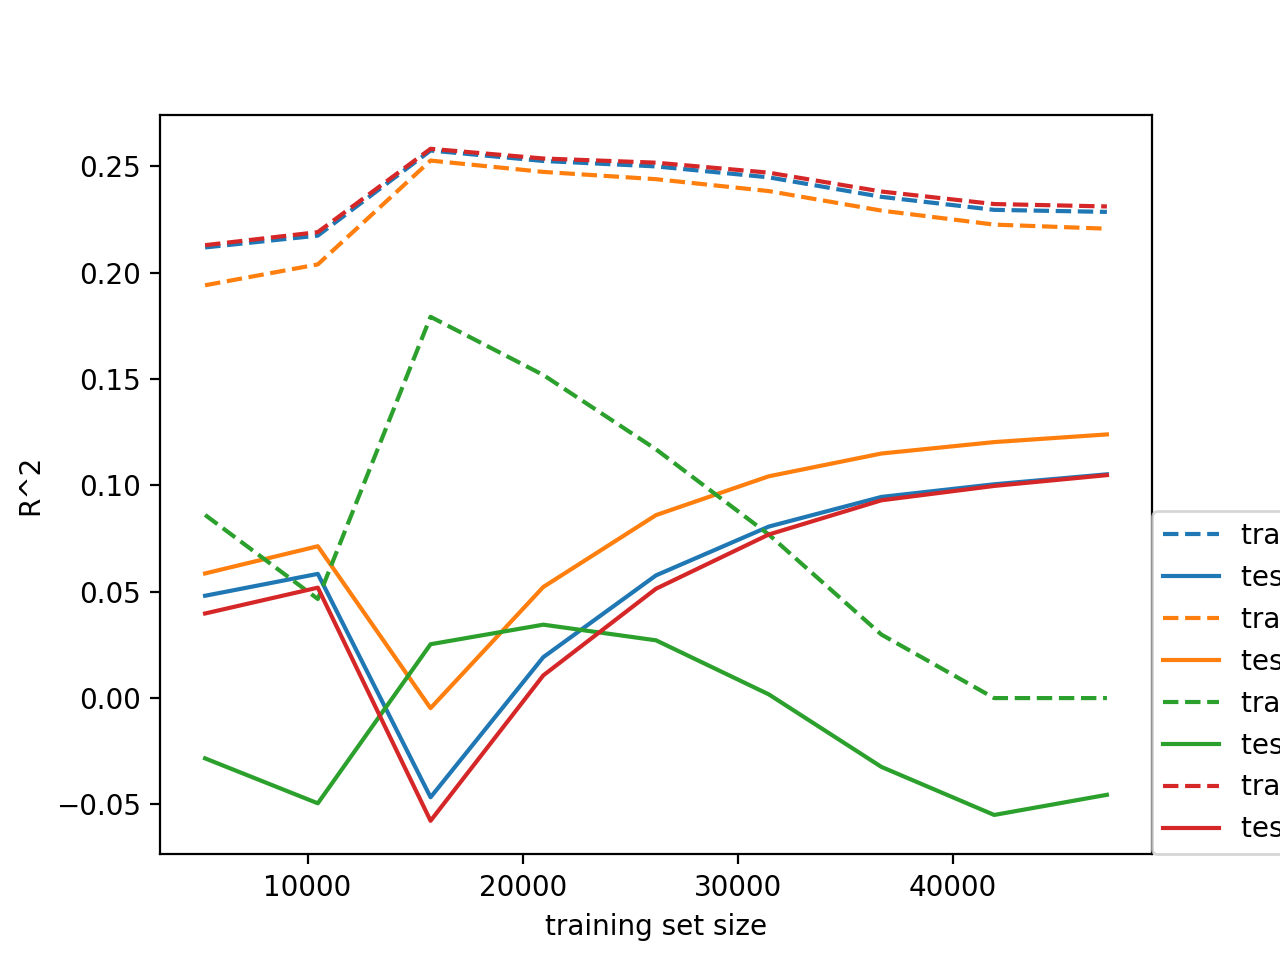

Text(0, 0.5, 'R^2')

In [114]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(est, name):
    train_set_size, train_scores, test_scores = learning_curve(est, X_train, y_train, cv=10, train_sizes=np.linspace(0, 1, 10)[1:])
    test_mean = test_scores.mean(axis=1)
    train_mean = train_scores.mean(axis=1)
    line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score {}".format(name))
    plt.plot(train_set_size, test_mean, label="test score {}".format(name),
             c=line.get_color())
    
plot_learning_curve(Lasso(alpha=0.001, normalize = True), "alpha=0.001")
plot_learning_curve(Lasso(alpha=0.01, normalize = True), "alpha=0.01")
plot_learning_curve(Lasso(alpha=0.1, normalize = True), "alpha=0.1")

plot_learning_curve(LinearRegression(), "lr")
plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")

In [115]:
#We can tell that the best performing alpha's on the training set are: Ridge = 1, Lasso =~ 0.01. The other two 
#tests are arbitrarily multiples of 10. As we can see, the best test set alphas are the orange lines, 
#which represent the values calculated above.

In [136]:
#KNN

dftrain[281] = np.where(dftrain[280]>= 1, 1, 0)
dftest[281] = np.where(dftest[280]>=1,1,0)

y_train_knn = dftrain.iloc[:,-1]
y_test_knn = dftest.iloc[:,-1]

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=12)
clf.fit(X_train, y_train_knn)
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test_knn)))

Test set accuracy: 0.80


In [138]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 14
neighbors_settings = range(1, 15)
#could not make it longer since my computer cannot run it.

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train_knn)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train_knn))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test_knn))



The optimal amount of KNN = 8


The optimal amount of KNN = 8


<IPython.core.display.Javascript object>


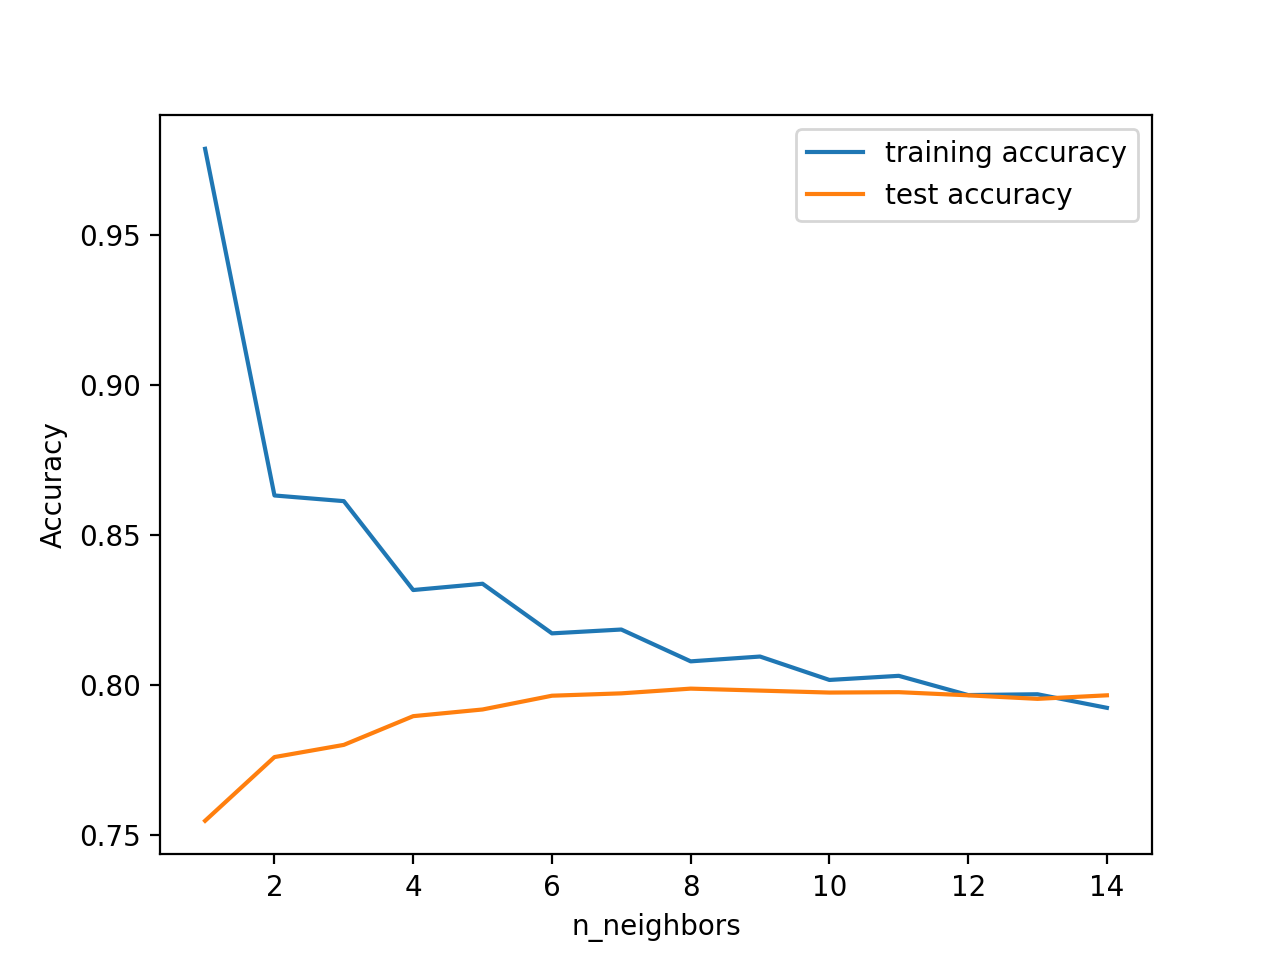

In [139]:
print("The optimal amount of KNN = " + str(test_accuracy.index(max(test_accuracy)) + 1))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
#Conclusion: KNN is best when it looks for votes from its 8 nearest neighbours.

In [ ]:
#SVM
from sklearn.svm import SVC

#Create a svm Classifier
clf_svc = SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf_svc.fit(X_train, y_train_knn)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print(f"Accuracy: {metrics.accuracy_score(y_test_knn, y_pred)}")

#We think this works, but it takes too long 